In [78]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

fname = 'rms.csv'
df = pd.read_csv(fname)
df['date'] = pd.to_datetime(df['date'])
df.head()

,w0,w1,w2,w3,w4,total,mean_age,date
0,115,46,48,29,39,277,13.368231,2022-04-22
1,109,49,42,29,43,272,13.750000,2022-04-21
2,115,45,44,27,40,271,13.479705,2022-04-20
3,104,50,46,27,40,267,13.494382,2022-04-19
4,100,55,45,26,39,265,13.403774,2022-04-18


In [79]:
# Worst days by number of non-fresh active RMs
df['olds'] = df.w1 + df.w2 + df.w3 + df.w4
df.sort_values(by='olds', ascending=False).head(10)

,w0,w1,w2,w3,w4,total,mean_age,date,olds
218,101,87,47,26,28,289,12.121107,2021-09-16,188
22,108,71,46,36,33,294,12.925170,2022-03-31,186
21,108,71,44,32,39,294,13.095238,2022-04-01,186
17,112,70,52,27,36,297,12.808081,2022-04-05,185
20,102,67,47,35,35,286,13.094406,2022-04-02,184
26,111,73,53,28,29,294,12.602041,2022-03-27,183
25,107,79,43,34,27,290,12.389655,2022-03-28,183
15,117,67,49,32,34,299,12.424749,2022-04-07,182
16,111,67,53,25,35,291,13.254296,2022-04-06,180
8,83,77,42,31,30,263,12.844106,2022-04-14,180


In [80]:
# Worst days by total number of active RMs
df.sort_values(by='total', ascending=False).head(10)

,w0,w1,w2,w3,w4,total,mean_age,date,olds
15,117,67,49,32,34,299,12.424749,2022-04-07,182
17,112,70,52,27,36,297,12.808081,2022-04-05,185
21,108,71,44,32,39,294,13.095238,2022-04-01,186
22,108,71,46,36,33,294,12.925170,2022-03-31,186
26,111,73,53,28,29,294,12.602041,2022-03-27,183
16,111,67,53,25,35,291,13.254296,2022-04-06,180
28,120,67,49,27,28,291,11.951890,2022-03-25,171
23,114,70,42,31,33,290,12.803448,2022-03-30,176
25,107,79,43,34,27,290,12.389655,2022-03-28,183
218,101,87,47,26,28,289,12.121107,2021-09-16,188


In [81]:
# Weekly data
dfw = pd.read_csv('rms_weekly.csv')
dfw['date'] = pd.to_datetime(dfw['date'])
dfw.tail(3)

,w0,w1,w2,w3,w4,total,mean_age,date
254,51,46,27,8,4,136,9.705882,2017-06-09
255,73,48,17,10,2,150,8.726667,2017-06-02
256,64,38,13,3,0,118,7.296610,2017-05-26


(0.0, 16.620581751377834)

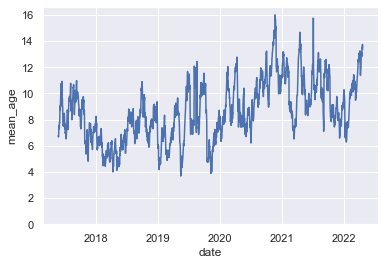

In [82]:
# Mean discussion age over time
ax = sns.lineplot(data=df, x='date', y='mean_age')
ax.set_ylim(0)

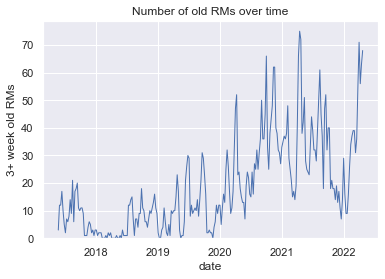

In [83]:
# Number of very old (>3 week) RMs over time
label = '3+ week old RMs'
dfw[label] = dfw.w3 + dfw.w4
ax = sns.lineplot(data=dfw, x='date', y=label, lw=1)
ax.set_ylim(0)
ax.set_title("Number of old RMs over time")
plt.savefig('old_RMs_over_time.png', dpi=144)

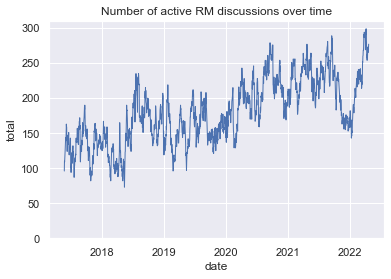

In [84]:
ax = sns.lineplot(data=df, x='date', y='total', lw=1)
ax.set_ylim(0)
ax.set_title("Number of active RM discussions over time")
plt.savefig('RMs_over_time.png', dpi=144)

In [85]:
df2 = df.copy()
df2['0-7'] = df['w0']
df2['7-13'] = df['w1']
df2['14+'] = df['w2'] + df['w3'] + df['w4']

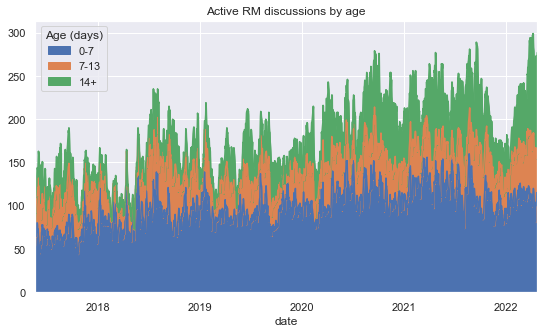

In [89]:
ax = df2.plot.area(
    x='date',
    y=['0-7', '7-13', '14+',],
    #colormap='YlOrRd',
    #colormap='plasma',
    figsize=(9, 5),
)
ax.legend().set_title("Age (days)")
ax.set_title("Active RM discussions by age")
plt.savefig('stacked_rms.png', dpi=144)

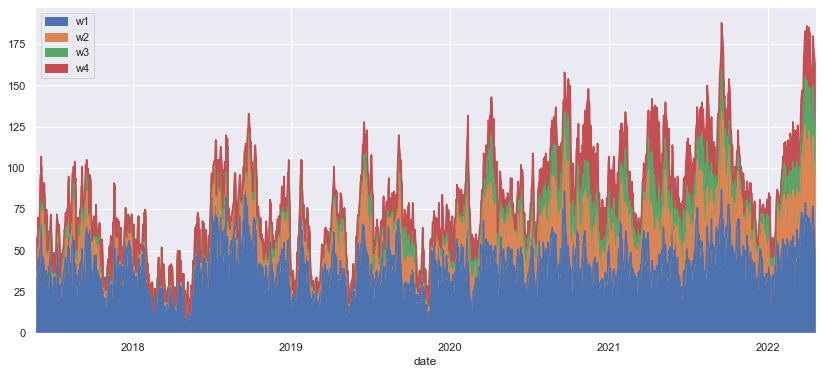

In [87]:
# Only backlog (no 0-7)
ax = df.plot.area(
    x='date',
    y=['w1', 'w2', 'w3', 'w4'],
    #colormap='YlOrRd',
    #colormap='viridis',
    figsize=(14, 6),
)

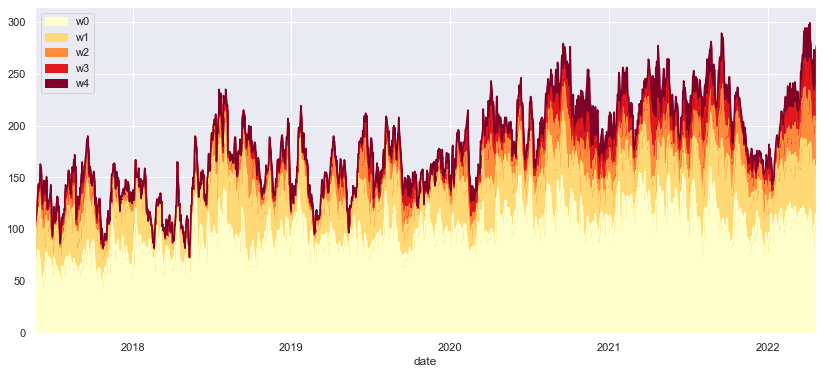

In [90]:
ax = df.plot.area(
    x='date',
    y=['w0', 'w1', 'w2', 'w3', 'w4'],
    colormap='YlOrRd',
    #colormap='viridis',
    figsize=(14, 6),
)
#plt.savefig('stacked_rms.png', dpi=144)